# Results analysis

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Optimization

We start with the optimization results. We first read the file and select the important columns.

In [109]:
optimization = pd.read_csv('../results/optimization_results.csv')
optimization = optimization[['duration', 'emissions', 'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy', 'gpu_energy', 'ram_energy', 'energy_consumed', 'domain', 'model', 'framework', 'strategy', 'iteration']]
optimization

,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,domain,model,framework,strategy,iteration
0,1.124975,0.000003,0.000003,32.5,13.883,11.957651,0.000010,0.000004,0.000004,0.000018,NLP,gpt2,torch,pruning,1.0
1,0.746583,0.000002,0.000003,32.5,12.950,11.957651,0.000007,0.000003,0.000002,0.000011,NLP,gpt2,torch,pruning,2.0
2,0.874974,0.000003,0.000003,32.5,12.930,11.957651,0.000008,0.000003,0.000003,0.000014,NLP,gpt2,torch,pruning,3.0
3,1.031193,0.000003,0.000003,32.5,12.746,11.957651,0.000009,0.000004,0.000003,0.000016,NLP,gpt2,torch,pruning,4.0
4,0.703145,0.000002,0.000003,32.5,12.917,11.957651,0.000006,0.000002,0.000002,0.000011,NLP,gpt2,torch,pruning,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,93.109754,0.000282,0.000003,32.5,13.319,11.957651,0.000840,0.000337,0.000309,0.001486,CG,codegpt,tf,quantization,26.0
716,92.360154,0.000279,0.000003,32.5,12.652,11.957651,0.000834,0.000329,0.000306,0.001469,CG,codegpt,tf,quantization,27.0
717,95.125613,0.000286,0.000003,32.5,12.740,11.957651,0.000859,0.000333,0.000315,0.001507,CG,codegpt,tf,quantization,28.0
718,96.109462,0.000291,0.000003,32.5,13.136,11.957651,0.000868,0.000344,0.000319,0.001530,CG,codegpt,tf,quantization,29.0


In [110]:
optimization_numeric = optimization[['duration', 'emissions', 'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy', 'gpu_energy', 'ram_energy', 'energy_consumed']]
optimization_numeric.mean()

duration           16.846109
emissions           0.000051
emissions_rate      0.000003
cpu_power          32.500000
gpu_power          12.815075
ram_power          11.957651
cpu_energy          0.000152
gpu_energy          0.000060
ram_energy          0.000056
energy_consumed     0.000268
dtype: float64

In [111]:
optimization_numeric.sum()

duration           12129.198173
emissions              0.036436
emissions_rate         0.002121
cpu_power          23400.000000
gpu_power           9226.854000
ram_power           8609.508820
cpu_energy             0.109493
gpu_energy             0.043201
ram_energy             0.040192
energy_consumed        0.192885
dtype: float64

In [112]:
group_model = optimization.groupby(['domain', 'model']).mean().drop(['iteration'], axis=1)
group_model

duration  emissions  emissions_rate  cpu_power  gpu_power  \
domain model                                                                    
CG     codegpt     25.650769   0.000077        0.000003       32.5  12.728608   
       codeparrot  22.567775   0.000068        0.000003       32.5  12.832650   
CV     regnet       4.595283   0.000014        0.000003       32.5  12.769667   
       resnet       4.925491   0.000015        0.000003       32.5  12.778233   
NLP    gpt2        24.840418   0.000075        0.000003       32.5  12.944483   
       opt         18.496915   0.000054        0.000003       32.5  12.836808   

                   ram_power  cpu_energy  gpu_energy  ram_energy  \
domain model                                                       
CG     codegpt     11.957651    0.000232    0.000091    0.000085   
       codeparrot  11.957651    0.000204    0.000081    0.000075   
CV     regnet      11.957651    0.000041    0.000016    0.000015   
       resnet      11.957651    0.000044    0.000018    0.000016   
NLP    gpt2        11.957651    0.000224    0.000089    0.000082   
       opt         11.957651    0.000167    0.000066    0.000061   

                   energy_consumed  
domain model                        
CG     codegpt            0.000408  
       codeparrot         0.000359  
CV     regnet             0.000073  
       resnet             0.000078  
NLP    gpt2               0.000395  
       opt                0.000294

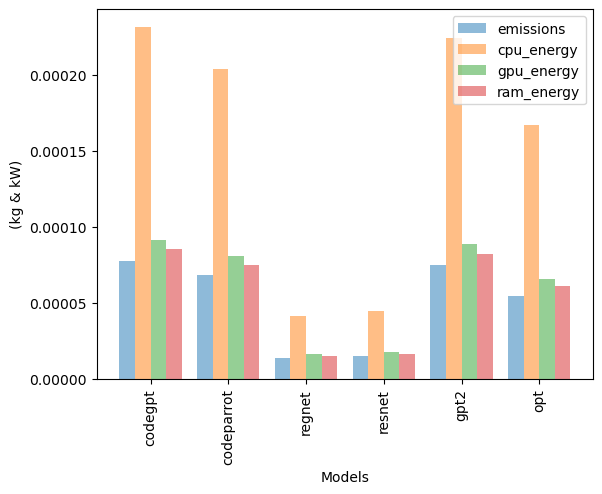

In [113]:
plot_df = group_model.reset_index()
columns_to_plot = ['emissions', 'cpu_energy', 'gpu_energy', 'ram_energy']
x_labels = plot_df['model'].unique()

num_columns = len(columns_to_plot)
bar_width = 0.8 / num_columns

for i, column in enumerate(columns_to_plot):
    offset = i - (num_columns - 1) / 2.0
    x = np.arange(len(plot_df)) + offset * bar_width
    plt.bar(x, plot_df.loc[plot_df['model'] == x_labels, column], width=bar_width, alpha=0.5, label=column)
plt.xticks(np.arange(len(x_labels)), x_labels, rotation='vertical')

plt.xlabel('Models')
plt.ylabel('(kg & kW)')
# Add the legend
plt.legend(loc='upper right')

plt.show()

In [114]:
group_strat = optimization.groupby(['framework', 'strategy']).mean().drop(['iteration'], axis=1)
group_strat

duration  emissions  emissions_rate  cpu_power  \
framework strategy                                                        
tf        pruning        0.949028   0.000003        0.000003       32.5   
          quantization  64.215418   0.000193        0.000003       32.5   
torch     pruning        0.691102   0.000002        0.000003       32.5   
          quantization   1.528887   0.000005        0.000003       32.5   

                        gpu_power  ram_power  cpu_energy  gpu_energy  \
framework strategy                                                     
tf        pruning       12.907094  11.957651    0.000009    0.000003   
          quantization  12.814544  11.957651    0.000580    0.000229   
torch     pruning       12.729161  11.957651    0.000006    0.000003   
          quantization  12.809500  11.957651    0.000014    0.000005   

                        ram_energy  energy_consumed  
framework strategy                                   
tf        pruning         0.000003         0.000015  
          quantization    0.000213         0.001021  
torch     pruning         0.000002         0.000011  
          quantization    0.000005         0.000024

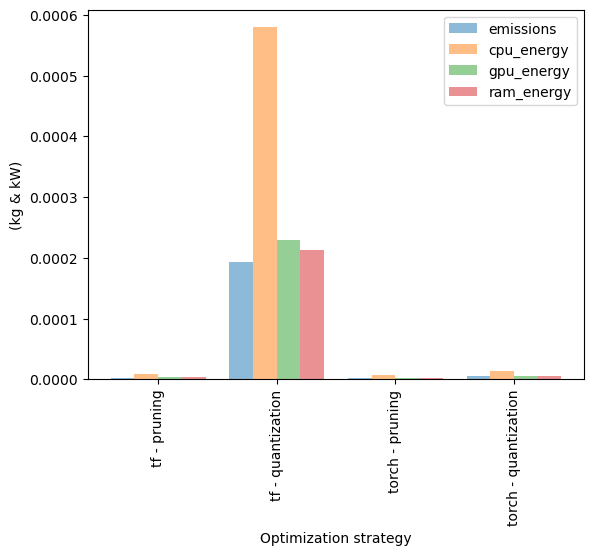

In [115]:
plot_df = group_strat.reset_index()
columns_to_plot = ['emissions', 'cpu_energy', 'gpu_energy', 'ram_energy']

num_columns = len(columns_to_plot)
bar_width = 0.8 / num_columns

for i, column in enumerate(columns_to_plot):
    offset = i - (num_columns - 1) / 2.0
    x = np.arange(len(plot_df)) + offset * bar_width
    plt.bar(x, plot_df[column], width=bar_width, alpha=0.5, label=column)

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['strategy'], rotation='vertical')

plt.xlabel('Optimization strategy')
plt.ylabel('(kg & kW)')
# Add the legend
plt.legend(loc='upper right')

plt.show()

## Inference

In [116]:
inference = pd.read_csv('../results/inference_results.csv')
inference = inference[['duration', 'emissions', 'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy', 'gpu_energy', 'ram_energy', 'energy_consumed', 'domain', 'model', 'framework', 'version', 'iteration', 'correctness']]
inference = inference.replace('quantized.pth', 'quantized')
inference

,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,domain,model,framework,version,iteration,correctness
0,59.276125,0.000182,0.000003,32.5,13.785,11.957651,0.000535,0.000225,0.000196,0.000956,NLP,gpt2,torch,baseline,1.0,0.895445
1,59.687963,0.000181,0.000003,32.5,13.197,11.957651,0.000539,0.000218,0.000198,0.000954,NLP,gpt2,torch,baseline,2.0,0.898786
2,60.156222,0.000183,0.000003,32.5,13.872,11.957651,0.000543,0.000223,0.000199,0.000966,NLP,gpt2,torch,baseline,3.0,0.908001
3,61.515913,0.000187,0.000003,32.5,13.707,11.957651,0.000555,0.000227,0.000204,0.000986,NLP,gpt2,torch,baseline,4.0,0.892121
4,59.798992,0.000182,0.000003,32.5,13.506,11.957651,0.000540,0.000222,0.000198,0.000960,NLP,gpt2,torch,baseline,5.0,0.891528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,27.594316,0.000084,0.000003,32.5,12.857,11.957651,0.000249,0.000101,0.000091,0.000441,Code,codegpt,tf,quantized,26.0,0.527349
1076,25.453180,0.000077,0.000003,32.5,12.855,11.957651,0.000230,0.000091,0.000084,0.000405,Code,codegpt,tf,quantized,27.0,0.527349
1077,30.093821,0.000091,0.000003,32.5,12.760,11.957651,0.000272,0.000108,0.000100,0.000479,Code,codegpt,tf,quantized,28.0,0.526099
1078,27.078465,0.000082,0.000003,32.5,12.968,11.957651,0.000244,0.000097,0.000090,0.000431,Code,codegpt,tf,quantized,29.0,0.527349


In [117]:
inference_numeric = inference[['duration', 'emissions', 'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy', 'gpu_energy', 'ram_energy', 'energy_consumed', 'correctness']]
inference_numeric.mean()

duration           35.109013
emissions           0.000107
emissions_rate      0.000003
cpu_power          32.500000
gpu_power          13.504006
ram_power          11.957651
cpu_energy          0.000317
gpu_energy          0.000130
ram_energy          0.000116
energy_consumed     0.000563
correctness         0.711619
dtype: float64

In [118]:
inference_numeric.sum()

duration           37917.733615
emissions              0.115226
emissions_rate         0.003292
cpu_power          35100.000000
gpu_power          14584.327000
ram_power          12914.263229
cpu_energy             0.342299
gpu_energy             0.140134
ram_energy             0.125792
energy_consumed        0.608225
correctness          768.548389
dtype: float64

In [119]:
group_model = inference.groupby(['domain', 'model']).mean().drop(['iteration'], axis=1)
group_model

duration  emissions  emissions_rate  cpu_power  \
domain          model                                                         
Code            codegpt     45.596017   0.000139        0.000003       32.5   
                codeparrot  59.436027   0.000180        0.000003       32.5   
Computer Vision regnet       4.277687   0.000013        0.000003       32.5   
                resnet       5.805064   0.000018        0.000003       32.5   
NLP             gpt2        48.857593   0.000149        0.000003       32.5   
                opt         46.681687   0.000142        0.000003       32.5   

                            gpu_power  ram_power  cpu_energy  gpu_energy  \
domain          model                                                      
Code            codegpt     13.253839  11.957651    0.000412    0.000167   
                codeparrot  13.299894  11.957651    0.000537    0.000218   
Computer Vision regnet      13.809111  11.957651    0.000039    0.000016   
                resnet      13.828022  11.957651    0.000052    0.000022   
NLP             gpt2        13.561933  11.957651    0.000441    0.000183   
                opt         13.271239  11.957651    0.000421    0.000172   

                            ram_energy  energy_consumed  correctness  
domain          model                                                 
Code            codegpt       0.000151         0.000730     0.531046  
                codeparrot    0.000197         0.000951     0.620015  
Computer Vision regnet        0.000014         0.000069     0.717222  
                resnet        0.000019         0.000094     0.750000  
NLP             gpt2          0.000163         0.000787     0.828890  
                opt           0.000155         0.000748     0.822540

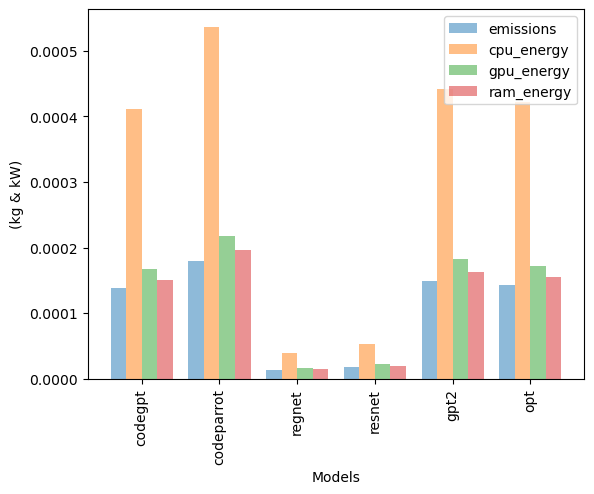

In [120]:
plot_df = group_model.reset_index()
columns_to_plot = ['emissions', 'cpu_energy', 'gpu_energy', 'ram_energy']
x_labels = plot_df['model'].unique()

num_columns = len(columns_to_plot)
bar_width = 0.8 / num_columns

for i, column in enumerate(columns_to_plot):
    offset = i - (num_columns - 1) / 2.0
    x = np.arange(len(plot_df)) + offset * bar_width
    plt.bar(x, plot_df.loc[plot_df['model'] == x_labels, column], width=bar_width, alpha=0.5, label=column)
plt.xticks(np.arange(len(x_labels)), x_labels, rotation='vertical')

plt.xlabel('Models')
plt.ylabel('(kg & kW)')

# Add the legend
plt.legend(loc='upper right')

plt.show()

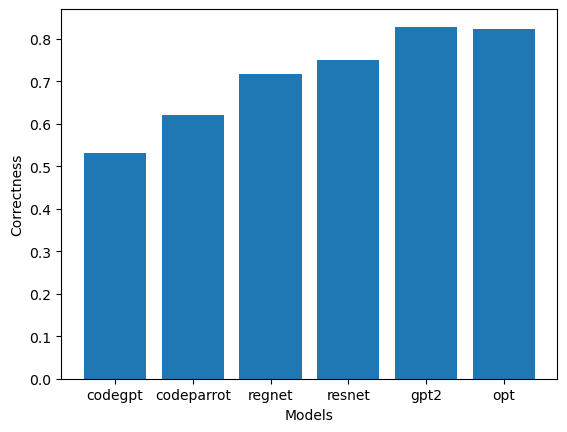

In [121]:
plt.bar(plot_df['model'], plot_df['correctness'])
plt.xlabel('Models')
plt.ylabel('Correctness')
plt.show()

In [122]:
group_version = inference.groupby(['framework', 'version']).mean().drop(['iteration'], axis=1)
group_version

duration  emissions  emissions_rate  cpu_power  \
framework version                                                      
tf        baseline   27.803172   0.000085        0.000003       32.5   
          pruned     30.740074   0.000094        0.000003       32.5   
          quantized  30.519617   0.000093        0.000003       32.5   
torch     baseline   38.436331   0.000117        0.000003       32.5   
          pruned     38.304052   0.000116        0.000003       32.5   
          quantized  44.850830   0.000136        0.000003       32.5   

                     gpu_power  ram_power  cpu_energy  gpu_energy  ram_energy  \
framework version                                                               
tf        baseline   13.358978  11.957651    0.000251    0.000103    0.000093   
          pruned     13.341567  11.957651    0.000278    0.000114    0.000102   
          quantized  13.338383  11.957651    0.000276    0.000112    0.000101   
torch     baseline   13.680378  11.957651    0.000347    0.000143    0.000127   
          pruned     13.710411  11.957651    0.000346    0.000142    0.000127   
          quantized  13.594322  11.957651    0.000405    0.000165    0.000149   

                     energy_consumed  correctness  
framework version                                  
tf        baseline          0.000447     0.696278  
          pruned            0.000494     0.696393  
          quantized         0.000488     0.785321  
torch     baseline          0.000617     0.798926  
          pruned            0.000614     0.505945  
          quantized         0.000719     0.786851

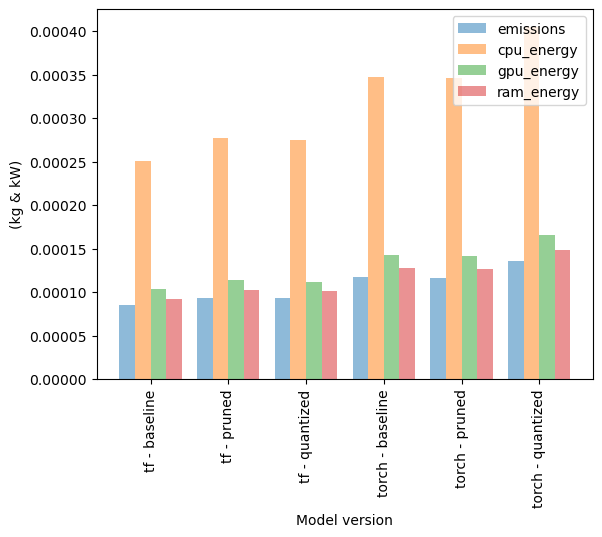

In [123]:
plot_df = group_version.reset_index()
columns_to_plot = ['emissions', 'cpu_energy', 'gpu_energy', 'ram_energy']

num_columns = len(columns_to_plot)
bar_width = 0.8 / num_columns

for i, column in enumerate(columns_to_plot):
    offset = i - (num_columns - 1) / 2.0
    x = np.arange(len(plot_df)) + offset * bar_width
    plt.bar(x, plot_df[column], width=bar_width, alpha=0.5, label=column)

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['version'], rotation='vertical')

plt.xlabel('Model version')
plt.ylabel('(kg & kW)')

# Add the legend
plt.legend(loc='upper right')

plt.show()

<BarContainer object of 6 artists>

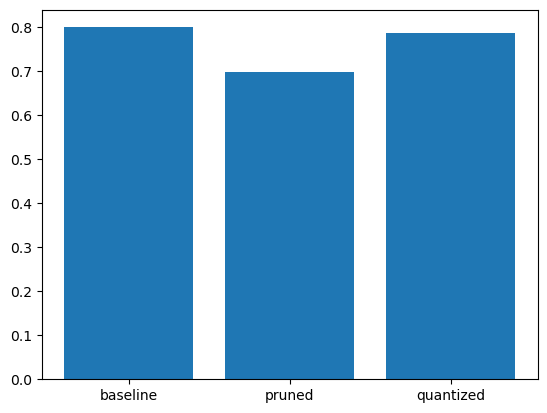

In [124]:
plt.bar(plot_df['version'], plot_df['correctness'])